# Stock Market Prediction

In [23]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

In [24]:
#Read file train and test
df_train = pd.read_csv("NASDAQ Data train.csv")
df_test = pd.read_csv("NASDAQ Data test.csv")

# Exploratory Data Analysis

In [25]:
print("Dataset Length:: ",len(df_train))
print("Dataset Shape:: ",df_train.shape)
print("Dataset Length:: ",len(df_test))
print("Dataset Shape:: ",df_test.shape)

Dataset Length::  1259
Dataset Shape::  (1259, 7)
Dataset Length::  23
Dataset Shape::  (23, 7)


<AxesSubplot:>

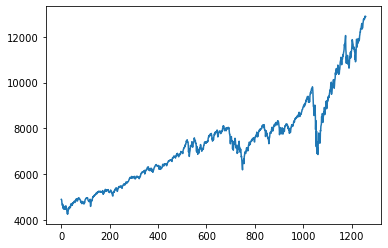

In [26]:
df_train.Close.plot() 

In [27]:
# create a line plot
from pandas import read_csv
from matplotlib import pyplot

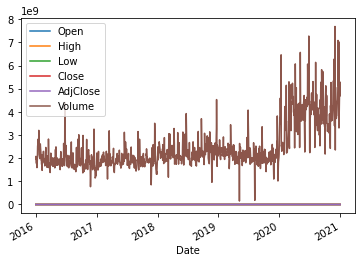

In [28]:
series = read_csv('NASDAQ Data train.csv', header=0, index_col=0,parse_dates=True)
series.plot()
pyplot.show()

In [29]:
# create a histogram plot
from pandas import read_csv
from matplotlib import pyplot

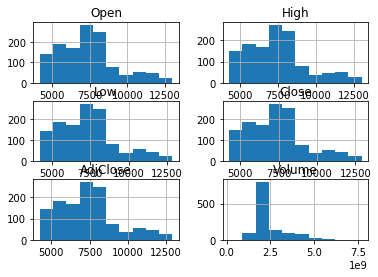

In [30]:
series = read_csv('NASDAQ Data train.csv', header=0, index_col=0,parse_dates=True)
series.hist()
pyplot.show()

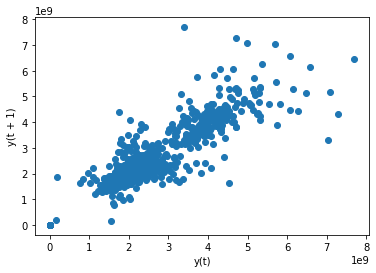

In [31]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = read_csv('NASDAQ Data train.csv', header=0, index_col=0,parse_dates=True)
lag_plot(series)
pyplot.show()

# Splitting data

In [32]:
Train = df_train
Test = df_test

# Moving Average 

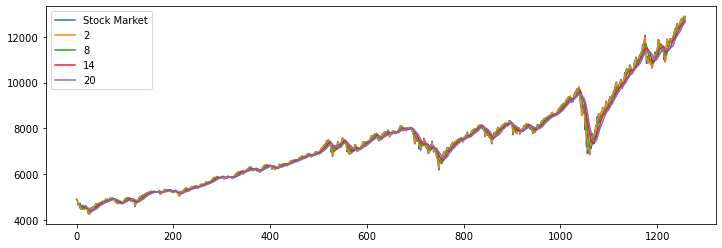

In [33]:
plt.figure(figsize=(12,4))
df_train.Close.plot(label="Stock Market")
for i in range(2,24,6):
    df_train["Close"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

# Time series decomposition plot 


<ipython-input-34-9b1b829d8376>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(df_train.Close,freq=12)


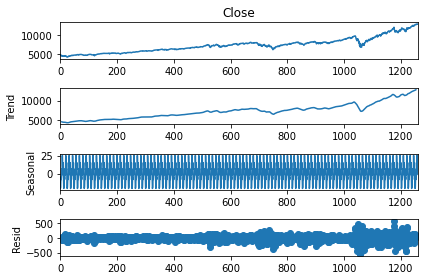

In [34]:
decompose_ts_add = seasonal_decompose(df_train.Close,freq=12)
decompose_ts_add.plot()
plt.show() 

# ACF plots and PACF plots


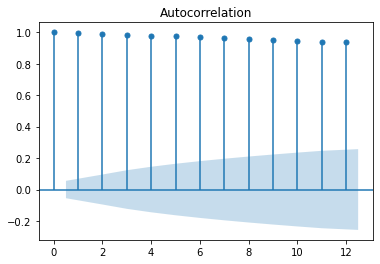

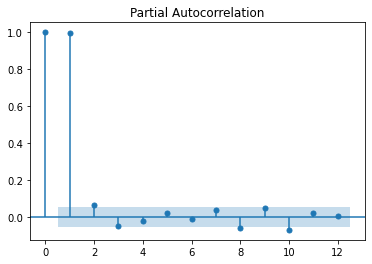

In [35]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df_train.Close,lags=12)
tsa_plots.plot_pacf(df_train.Close,lags=12)
plt.show() 

### Evaluation Metric MAPE

In [36]:
def MAPE(pred,stk):
    temp = np.abs((pred- stk)/stk)*100
    return np.mean(temp)  

### Simple Exponential Method


In [37]:
Train["Close"] = Train["Close"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Close"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Close)   

C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


73.84575598434

### Holt method 

In [38]:
hw_model = Holt(Train["Close"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Close)   

C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-38-1c2ec9d47d20>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Close"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


74.14387230375495

### Holts winter exponential smoothing with additive seasonality and additive trend


In [39]:
hwe_model_add_add = ExponentialSmoothing(Train["Close"],seasonal="add",trend="add",seasonal_periods=10).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Close)  

C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


73.79187009329623

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [40]:
hwe_model_mul_add = ExponentialSmoothing(Train["Close"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Close)  

C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


74.14775006281357

## Final Model by combining train and test

In [41]:
df_train["Close"] = df_train["Close"] .astype('double')
hwe_model_add_add = ExponentialSmoothing(Train["Close"],seasonal="add",trend="add",seasonal_periods=10).fit() #add the trend to the model

C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [42]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)    

1259    12932.315212
1260    13019.057374
1261    13063.390752
1262    13122.318284
1263    13139.509290
1264    13197.146818
1265    13248.725863
1266    13190.124483
1267    13219.325955
1268    13200.761294
dtype: float64

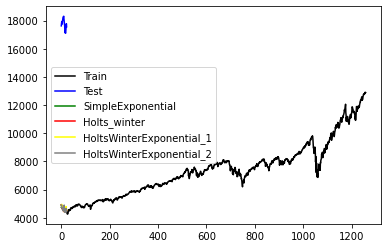

In [43]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Close"], label='Train',color="black")
plt.plot(Test.index, Test["Close"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="yellow")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="grey")
plt.legend(loc='best')